In [3]:
from jax import numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt

In [17]:
# Parameters
nb    = 100     # Number of points
xmin  = 0       # Distribution / x
xmax  = 10
a     = 4       # Distribution / y
b     = 2       # y= a.x + b (+ noise)
noise = 7
key = random.PRNGKey(42)

theta = jnp.array([[a],[b]])

# Vector X  (1,x) x nb
# the first column is set to 1 so that X.theta <=> 1.b + x.a

Xc1 = jnp.ones((nb,1))
Xc2 = random.uniform(key, (nb,1), minval=xmin, maxval=xmax)
X = jnp.c_[ Xc1, Xc2 ]

# Noise
N = noise * random.normal(key, (nb,1))

# Vector Y
Y = (X @ theta) + N

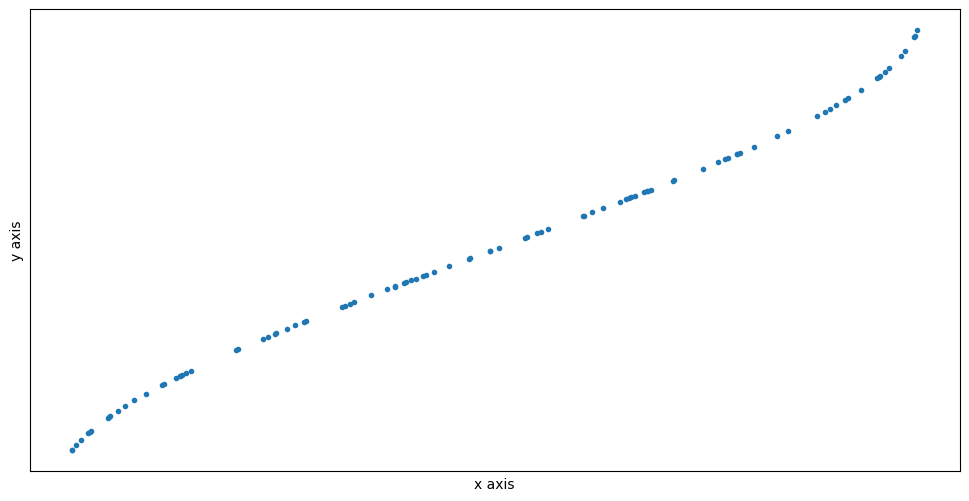

In [18]:
width = 12
height = 6

fig, ax = plt.subplots()
fig.set_size_inches(width,height)
ax.plot(X[:,1], Y, ".")
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
plt.show()

In [19]:
theta_hat = jnp.linalg.inv(X.T @ X) @ X.T @ Y

print("Theta :\n",theta,"\n\ntheta hat :\n",theta_hat)

Theta :
 [[4]
 [2]] 

theta hat :
 [[-7.6877003]
 [ 4.3560476]]


In [20]:
Xd = jnp.array([[1,xmin], [1,xmax]])
Yd = Xd @ theta_hat

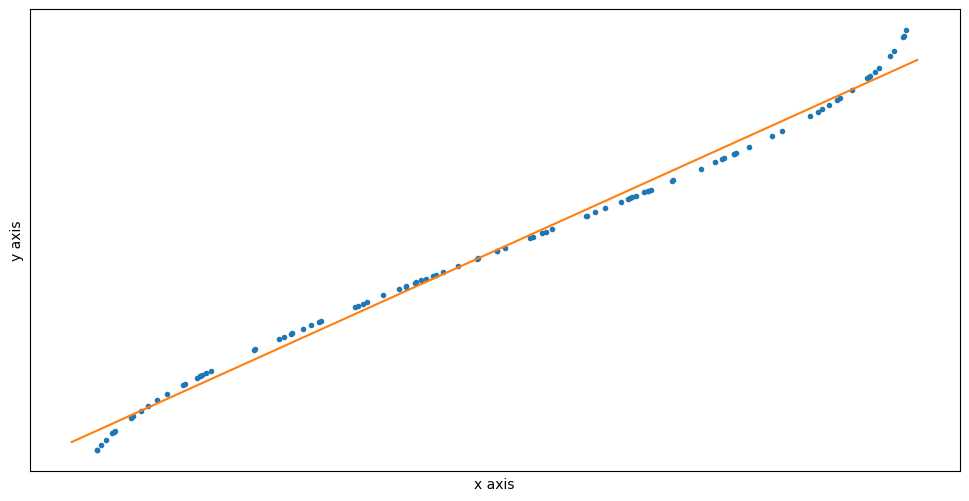

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(width,height)
ax.plot(X[:,1], Y, ".")
ax.plot(Xd[:,1], Yd, "-")
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
plt.show()